In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r"Dry_Bean_Dataset.xlsx")

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.duplicated().sum()

68

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(13543, 17)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13543.0,53048.460385,29392.438324,20420.000000,36282.500000,44580.000000,61382.000000,254616.000000
Perimeter,13543.0,854.993406,214.722684,524.736000,703.230000,793.896000,977.146500,1985.370000
MajorAxisLength,13543.0,319.895602,85.809260,183.601165,253.086806,296.404589,376.312489,738.860153
MinorAxisLength,13543.0,202.365321,45.051632,122.512653,175.886357,192.491117,217.245403,460.198497
AspectRation,13543.0,1.581075,0.245245,1.024868,1.430662,1.549860,1.703916,2.430306
Eccentricity,13543.0,0.750315,0.091858,0.218951,0.715144,0.763997,0.809671,0.911423
ConvexArea,13543.0,53767.986709,29844.248525,20684.000000,36673.000000,45122.000000,62360.000000,263261.000000
EquivDiameter,13543.0,253.034094,59.307709,161.243764,214.933277,238.245711,279.560351,569.374358
Extent,13543.0,0.749829,0.048939,0.555315,0.718735,0.759903,0.786849,0.866195
Solidity,13543.0,0.987152,0.004650,0.919246,0.985678,0.988288,0.990019,0.994677


<Axes: >

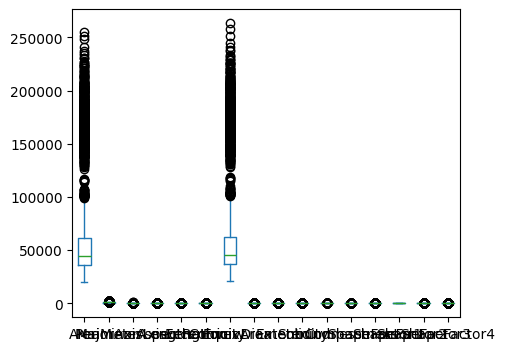

In [13]:
df.plot.box(figsize=(5,4))

In [16]:
cols = df.columns
cols

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

<Axes: >

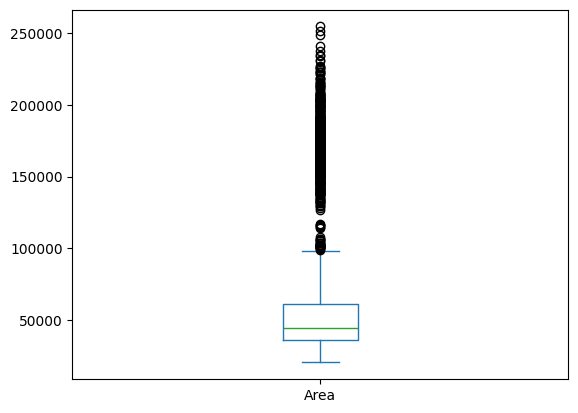

In [17]:
df["Area"].plot.box()

<Axes: ylabel='Frequency'>

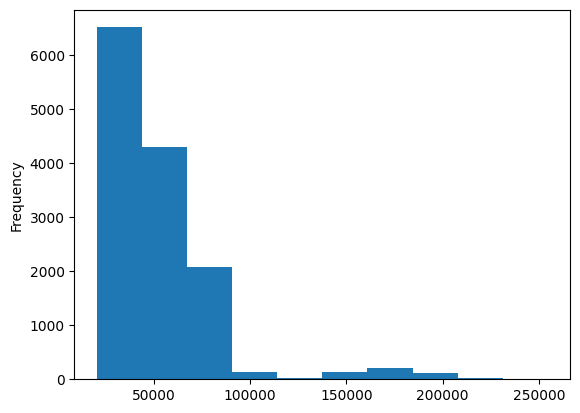

In [19]:
df["Area"].plot.hist()

In [26]:
a = df["Area"].quantile(0.95)
a

89986.9

<Axes: >

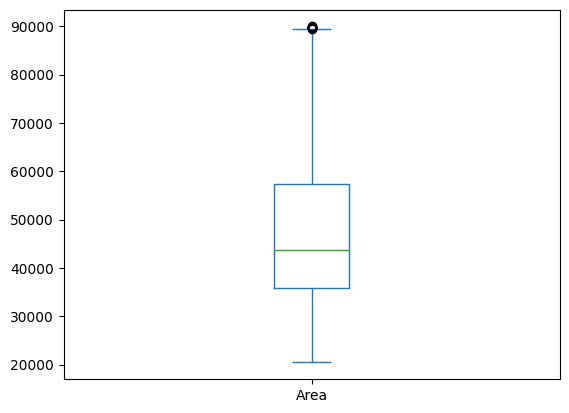

In [27]:
df[df["Area"]<=a]["Area"].plot.box()

In [31]:
new_df = df.copy()

In [54]:
b = new_df[new_df["Area"]>a]["Area"]

In [60]:
df.iloc[b.index,0] = df.iloc[b.index,0].replace(df.iloc[b.index,0].values, df["Area"].mean())

In [64]:
df.shape

(13543, 17)

<Axes: >

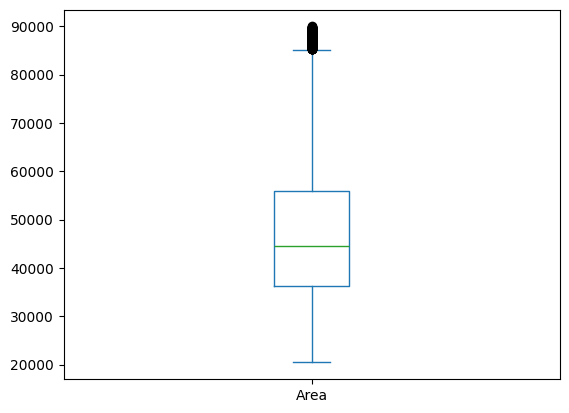

In [63]:
df["Area"].plot.box()

In [66]:
df.iloc[b.index,0]

3305    53048.460385
3306    53048.460385
3307    53048.460385
3308    53048.460385
3309    53048.460385
            ...     
5496    53048.460385
5497    53048.460385
5498    53048.460385
5499    53048.460385
5500    53048.460385
Name: Area, Length: 678, dtype: float64

<Axes: >

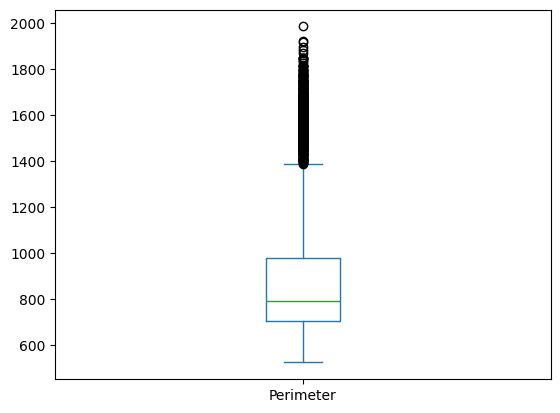

In [67]:
df["Perimeter"].plot.box()

In [77]:
a = df["Perimeter"].quantile(0.965)
a

1432.7170199999998

In [83]:
b = df[df["Perimeter"]>a]["Perimeter"].index
b

Index([3374, 3389, 3390, 3397, 3398, 3400, 3401, 3402, 3403, 3404,
       ...
       3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870],
      dtype='int64', length=474)

In [84]:
df.iloc[b,1] = df.iloc[b,1].replace(df.iloc[b,1].values, df["Perimeter"].mean())

<Axes: >

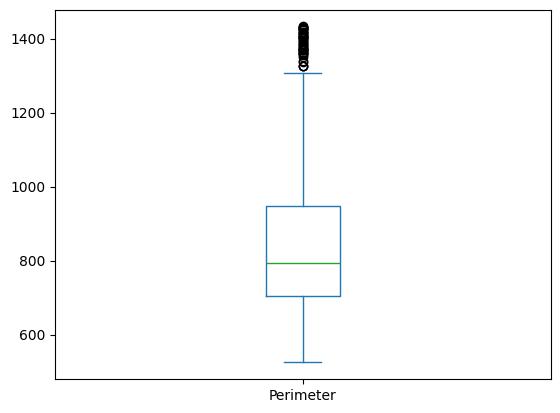

In [85]:
df["Perimeter"].plot.box()

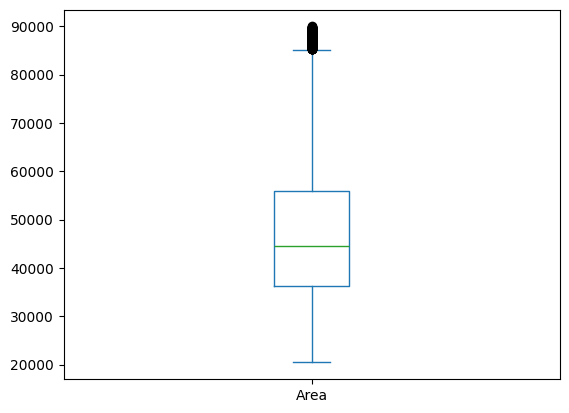

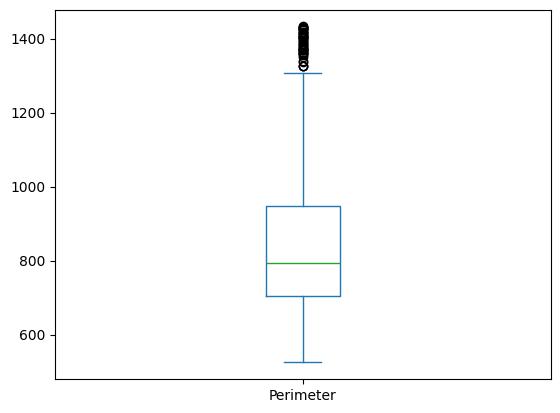

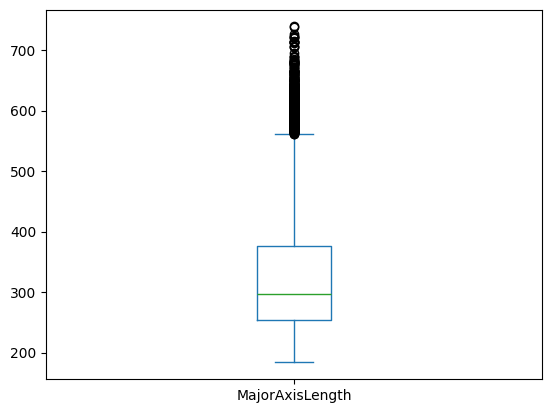

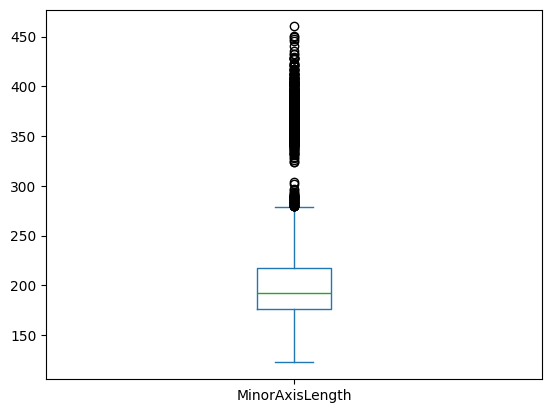

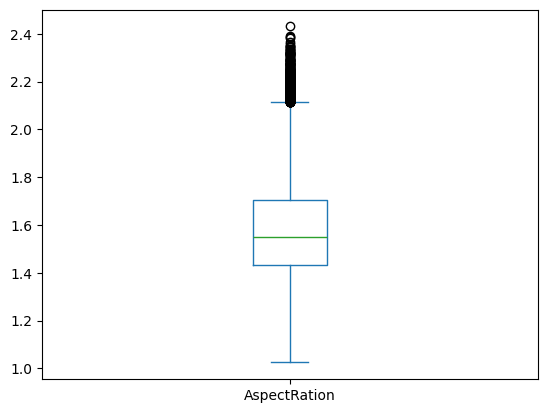

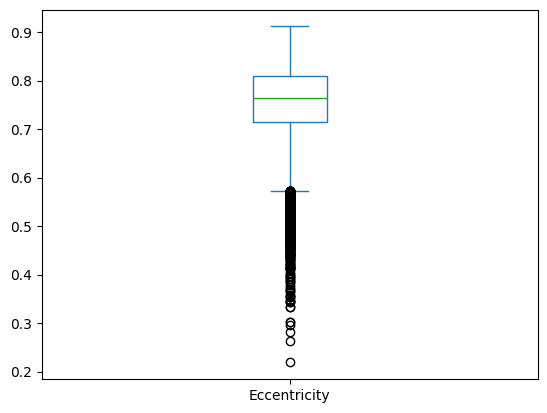

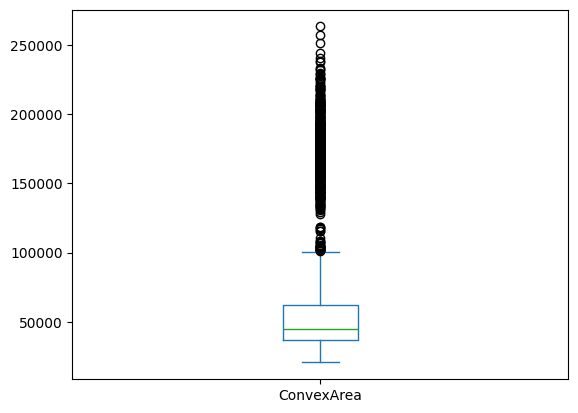

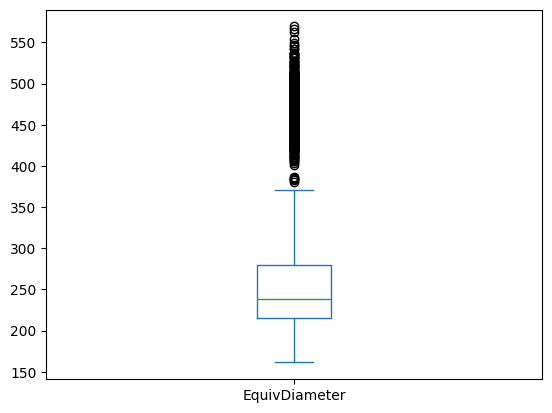

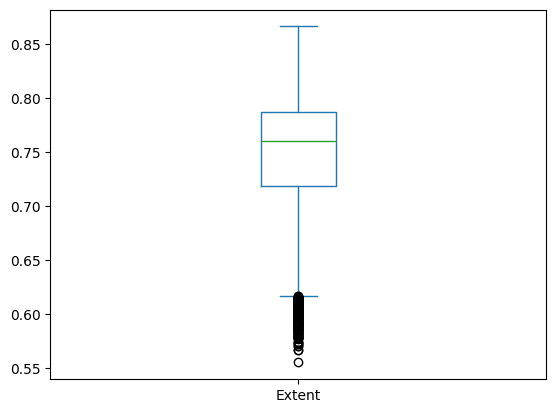

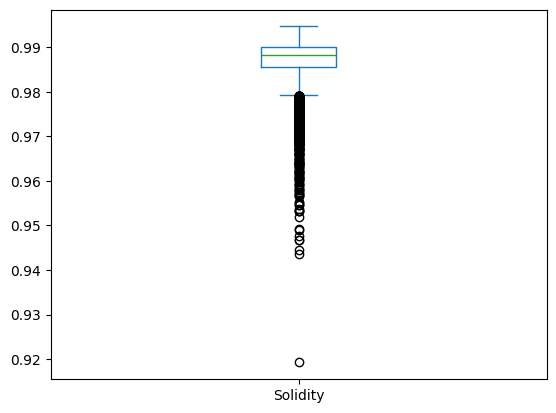

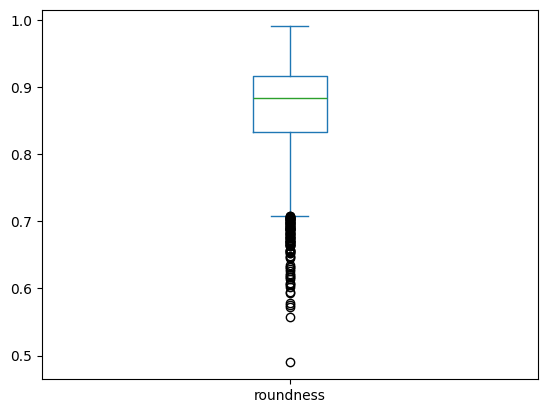

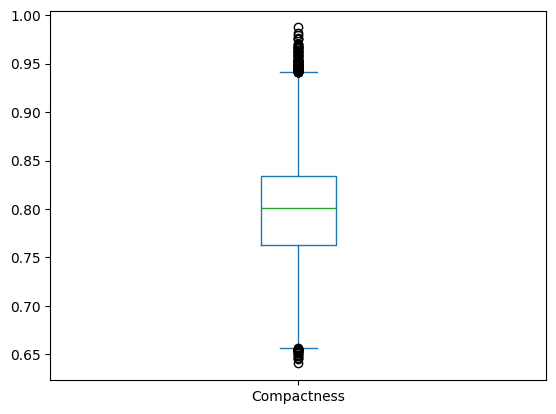

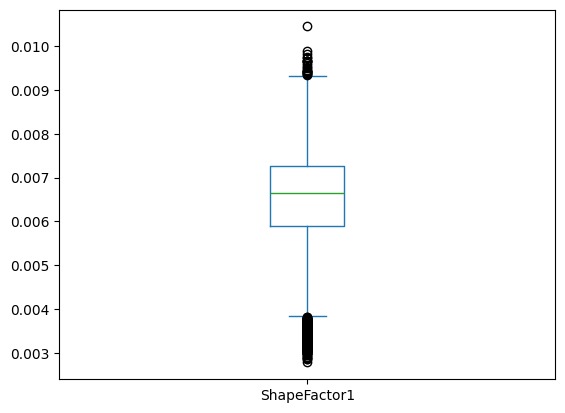

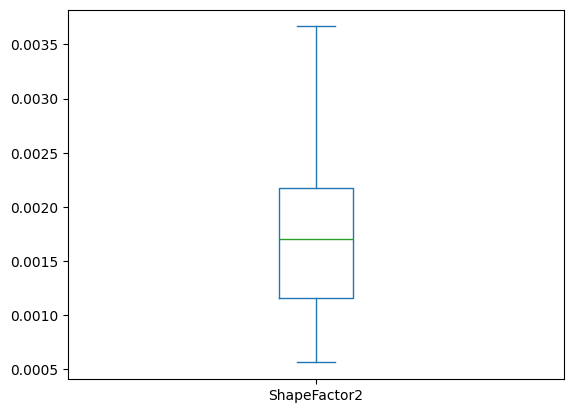

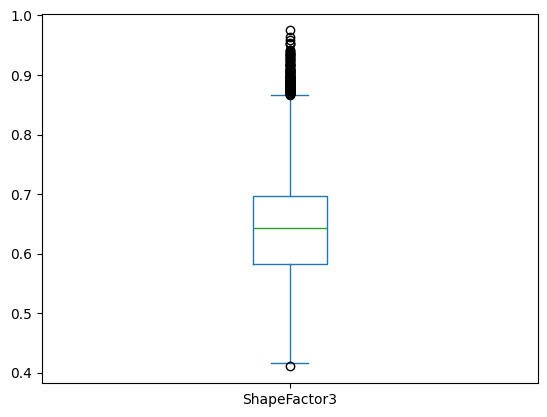

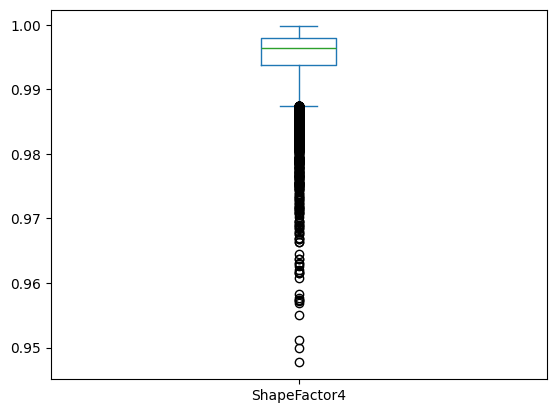

In [88]:
for i in cols[:-1]:
    df[i].plot.box()
    plt.show()

In [94]:
up = ["MajorAxisLength", "MinorAxisLength", "ConvexArea", "EquivDiameter", "ShapeFactor3"]
down = ["Eccentricity", "Solidity", "roundness", "ShapeFactor4"]

In [100]:
up_quntile = df[up].quantile(0.96)
up_quntile

MajorAxisLength       477.205317
MinorAxisLength       287.107957
ConvexArea         103082.160000
EquivDiameter         359.158606
ShapeFactor3            0.836551
Name: 0.96, dtype: float64

In [101]:
down_quantile = df[down].quantile(0.05)
down_quantile

Eccentricity    0.560923
Solidity        0.978436
roundness       0.771017
ShapeFactor4    0.987027
Name: 0.05, dtype: float64

In [108]:
up_quntile.index

Index(['MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter',
       'ShapeFactor3'],
      dtype='object')

In [109]:
up_quntile.values

array([4.77205317e+02, 2.87107957e+02, 1.03082160e+05, 3.59158606e+02,
       8.36550566e-01])

In [111]:
for i, j in zip(up_quntile.index, up_quntile.values):
    df = df[df[i]<= j]

In [114]:
for i, j in zip(down_quantile.index, down_quantile.values):
    df = df[df[i] >= j]

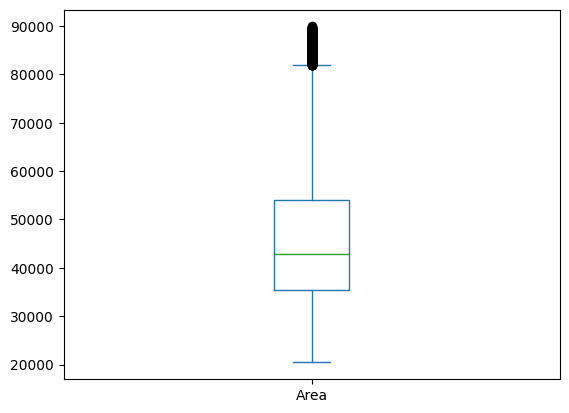

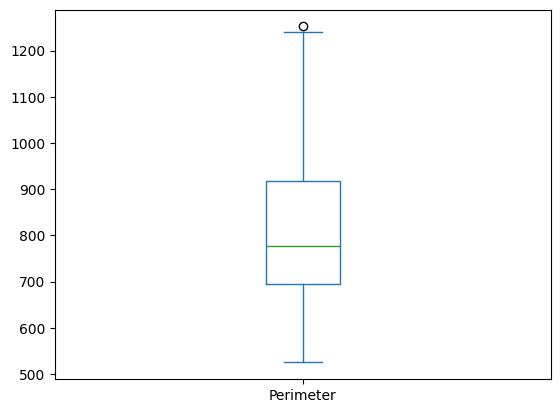

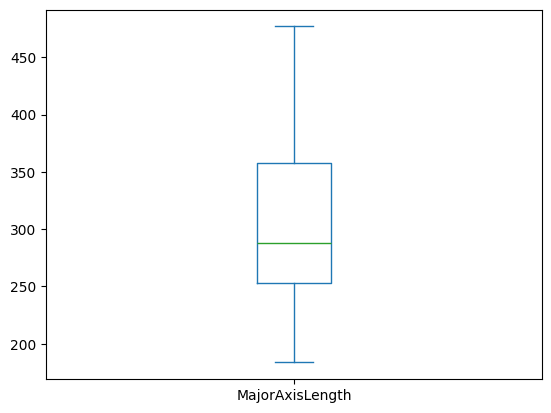

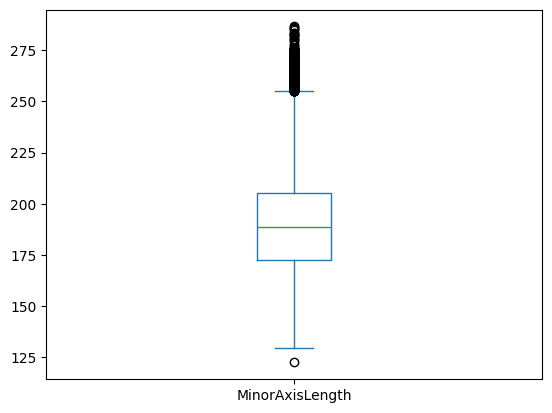

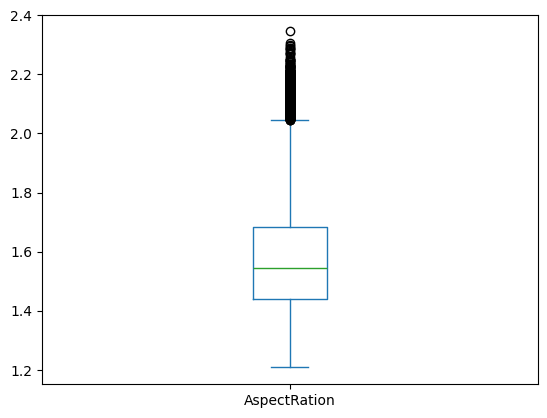

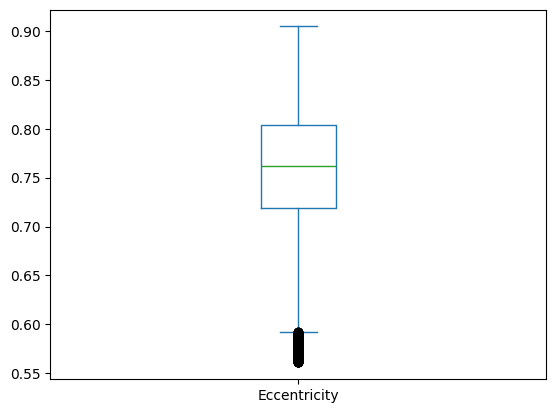

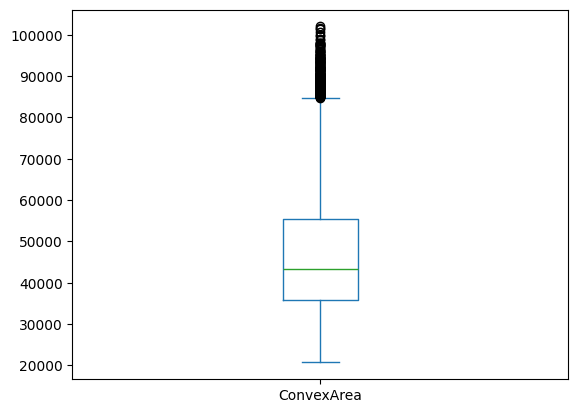

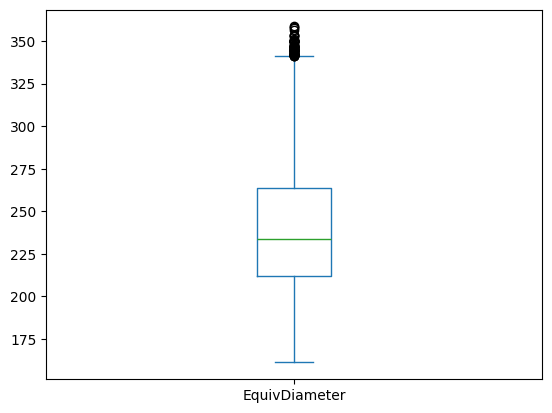

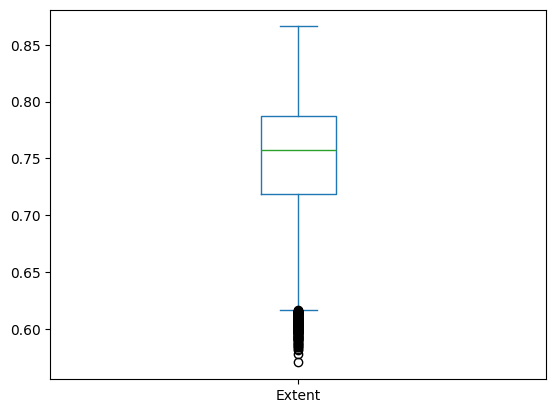

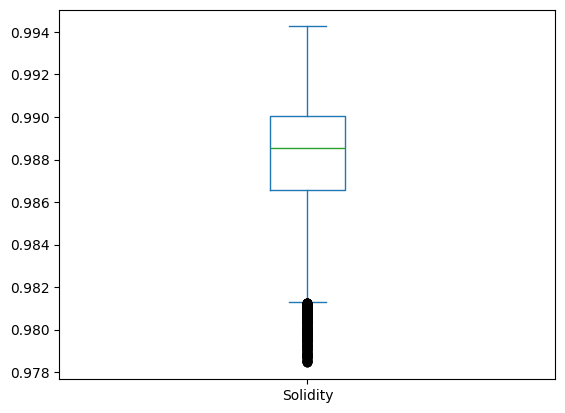

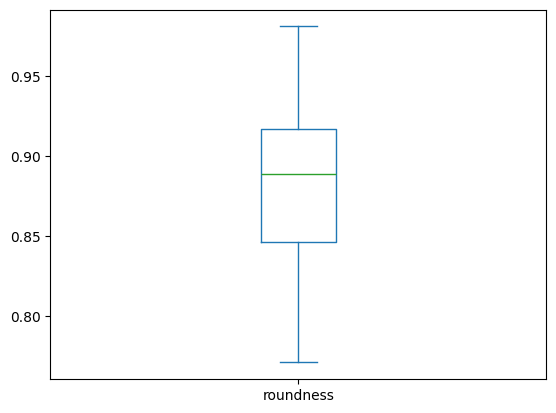

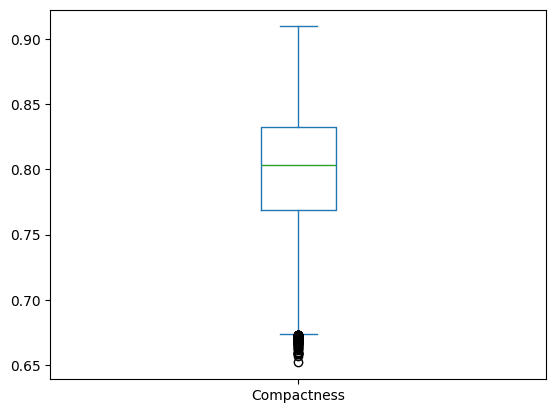

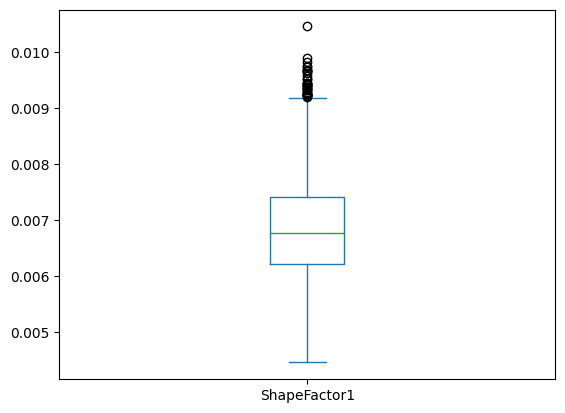

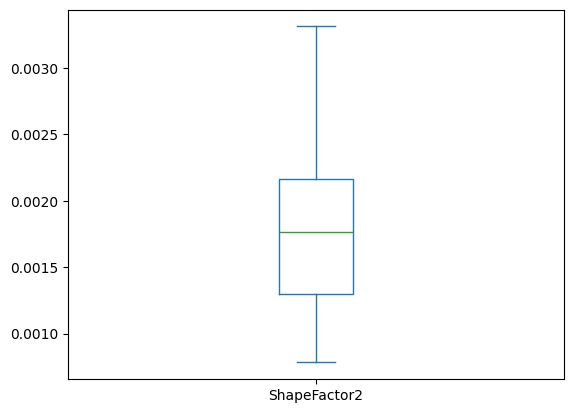

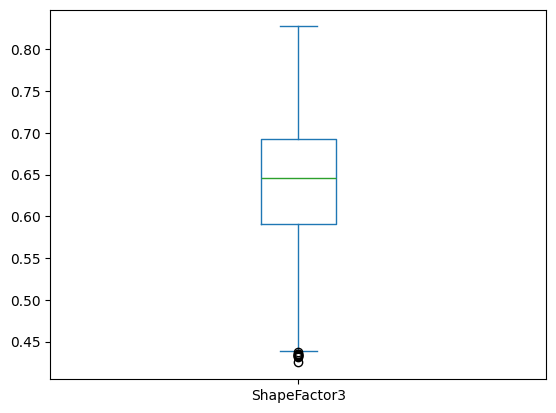

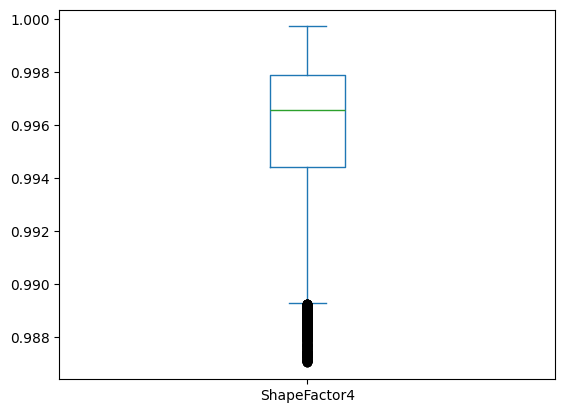

In [115]:
for i in cols[:-1]:
    df[i].plot.box()
    plt.show()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10984 entries, 0 to 10983
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10984 non-null  float64
 1   Perimeter        10984 non-null  float64
 2   MajorAxisLength  10984 non-null  float64
 3   MinorAxisLength  10984 non-null  float64
 4   AspectRation     10984 non-null  float64
 5   Eccentricity     10984 non-null  float64
 6   ConvexArea       10984 non-null  int64  
 7   EquivDiameter    10984 non-null  float64
 8   Extent           10984 non-null  float64
 9   Solidity         10984 non-null  float64
 10  roundness        10984 non-null  float64
 11  Compactness      10984 non-null  float64
 12  ShapeFactor1     10984 non-null  float64
 13  ShapeFactor2     10984 non-null  float64
 14  ShapeFactor3     10984 non-null  float64
 15  ShapeFactor4     10984 non-null  float64
 16  Class            10984 non-null  object 
dtypes: float64(1

In [117]:
df.reset_index(drop=True, inplace=True)

In [120]:
le = LabelEncoder()

In [122]:
df["Class"] = le.fit_transform(df["Class"])

In [123]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,4
1,31374.0,636.401,219.865394,182.008864,1.207993,0.560995,31604,199.866499,0.769197,0.992722,0.973460,0.909040,0.007008,0.002952,0.826354,0.998230,4
2,31637.0,656.711,229.719255,175.510446,1.308864,0.645191,32045,200.702465,0.761823,0.987268,0.921842,0.873686,0.007261,0.002610,0.763327,0.999091,4
3,31675.0,657.431,236.752632,171.210559,1.382816,0.690678,32009,200.822963,0.740936,0.989565,0.920929,0.848240,0.007474,0.002387,0.719510,0.994950,4
4,31811.0,642.092,223.984683,180.917123,1.238051,0.589565,32052,201.253629,0.773877,0.992481,0.969600,0.898515,0.007041,0.002831,0.807329,0.999515,4


In [124]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.971128,0.929575,0.886246,0.430568,0.418878,0.973632,0.976525,-0.036025,-0.264936,-0.619432,-0.441462,-0.863475,-0.777342,-0.440339,-0.472749,-0.351511
Perimeter,0.971128,1.000000,0.970699,0.865996,0.517280,0.497198,0.988468,0.992186,-0.084298,-0.313711,-0.714019,-0.525113,-0.842853,-0.841378,-0.522847,-0.500749,-0.336187
MajorAxisLength,0.929575,0.970699,1.000000,0.736175,0.694137,0.663996,0.944405,0.950363,-0.141000,-0.270755,-0.772821,-0.699022,-0.717968,-0.928482,-0.695393,-0.556935,-0.291449
MinorAxisLength,0.886246,0.865996,0.736175,1.000000,0.030024,0.025125,0.908345,0.909826,0.097974,-0.189543,-0.325669,-0.039645,-0.983351,-0.490932,-0.039383,-0.296056,-0.293702
AspectRation,0.430568,0.517280,0.694137,0.030024,1.000000,0.946260,0.425893,0.438231,-0.323653,-0.202316,-0.815473,-0.990540,-0.022646,-0.859173,-0.983498,-0.492980,-0.096500
Eccentricity,0.418878,0.497198,0.663996,0.025125,0.946260,1.000000,0.417938,0.423167,-0.294532,-0.264702,-0.789327,-0.980781,-0.003557,-0.867352,-0.988410,-0.511528,-0.141768
ConvexArea,0.973632,0.988468,0.944405,0.908345,0.425893,0.417938,1.000000,0.995940,-0.032053,-0.273942,-0.617044,-0.438556,-0.874853,-0.778985,-0.437945,-0.479898,-0.367586
EquivDiameter,0.976525,0.992186,0.950363,0.909826,0.438231,0.423167,0.995940,1.000000,-0.040474,-0.253980,-0.622941,-0.447908,-0.890464,-0.796462,-0.446341,-0.473796,-0.315856
Extent,-0.036025,-0.084298,-0.141000,0.097974,-0.323653,-0.294532,-0.032053,-0.040474,1.000000,0.162047,0.310057,0.314096,-0.092990,0.229015,0.310141,0.125426,-0.028549
Solidity,-0.264936,-0.313711,-0.270755,-0.189543,-0.202316,-0.264702,-0.273942,-0.253980,0.162047,1.000000,0.550552,0.238007,0.132648,0.288795,0.246527,0.481400,0.300536


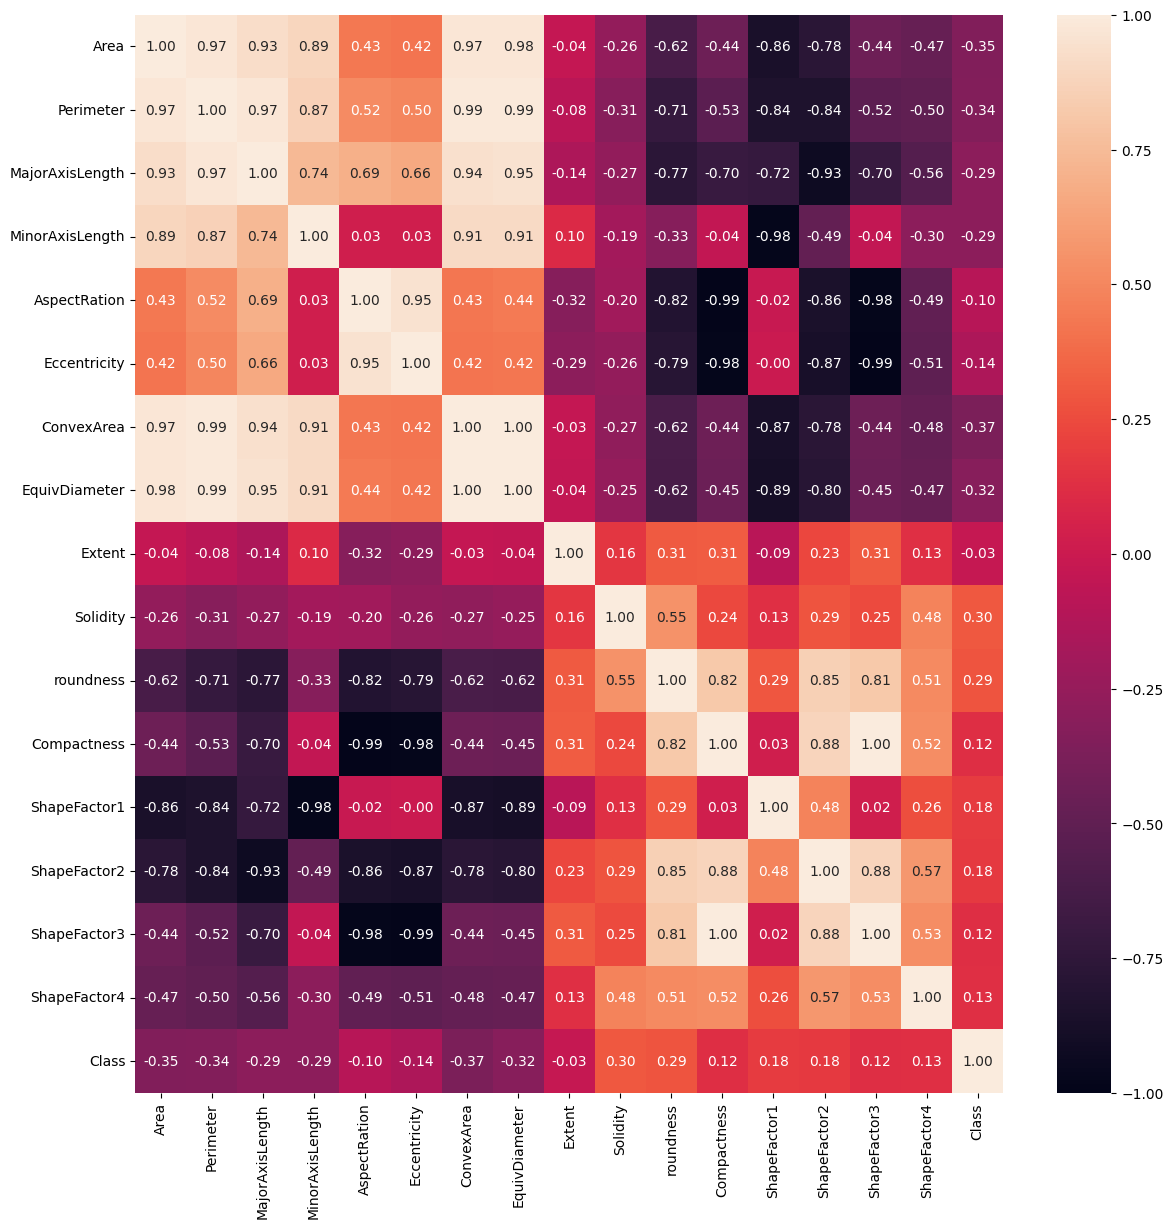

In [131]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [133]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [134]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=34)

In [135]:
scaler = StandardScaler()

In [137]:
scaled_train = scaler.fit_transform(X_tr)
scaled_test = scaler.transform(X_te)

In [140]:
round(scaled_train.mean())

0

In [141]:
round(scaled_test.mean())

0

In [142]:
round(scaled_train.std())

1

In [143]:
round(scaled_test.std())

1

In [145]:
pc = PCA(n_components=8)

In [146]:
train_data = pc.fit_transform(scaled_train)
test_data = pc.transform(scaled_test)

In [147]:
train_data.shape

(7688, 8)

In [153]:
log = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5, max_features=6)
knn = KNeighborsClassifier(n_neighbors=7)
lsvc = SVC(kernel="linear")
psvc = SVC(kernel="poly", degree=2)
rf = RandomForestClassifier(n_estimators=150, max_depth=5, max_features=6)

In [154]:
log.fit(train_data, y_tr)
dt.fit(train_data, y_tr)
knn.fit(train_data, y_tr)
lsvc.fit(train_data, y_tr)
psvc.fit(train_data, y_tr)
rf.fit(train_data, y_tr)

RandomForestClassifier(max_depth=5, max_features=6, n_estimators=150)

In [155]:
print("Logistic Score", log.score(train_data, y_tr))
print("Decision Tree Score", dt.score(train_data, y_tr))
print("KNN Score", knn.score(train_data, y_tr))
print("SVC Linear Score", lsvc.score(train_data, y_tr))
print("SVC Poly Score", psvc.score(train_data, y_tr))
print("Random Forest Score", rf.score(train_data, y_tr))

Logistic Score 0.9153225806451613
Decision Tree Score 0.8920395421436004
KNN Score 0.926378772112383
SVC Linear Score 0.9181841831425598
SVC Poly Score 0.8975026014568158
Random Forest Score 0.9086888657648283


In [156]:
print("Logistic Accuracy", accuracy_score(y_te, log.predict(test_data)))
print("Decision Tree Accuracy", accuracy_score(y_te, dt.predict(test_data)))
print("KNN Accuracy", accuracy_score(y_te, knn.predict(test_data)))
print("SVC Linear Accuracy", accuracy_score(y_te, lsvc.predict(test_data)))
print("SVC Poly Accuracy", accuracy_score(y_te, psvc.predict(test_data)))
print("Random Forest Accuracy", accuracy_score(y_te, rf.predict(test_data)))

Logistic Accuracy 0.9223300970873787
Decision Tree Accuracy 0.8895631067961165
KNN Accuracy 0.9205097087378641
SVC Linear Accuracy 0.9235436893203883
SVC Poly Accuracy 0.9032160194174758
Random Forest Accuracy 0.9047330097087378


In [157]:
params = {
    "n_neighbors":[5, 7, 9, 11, 13, 15, 17, 19, 21]
}

In [158]:
gsvc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, 
                   n_jobs=-1, verbose=True, cv=10)

In [159]:
gsvc.fit(train_data, y_tr)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21]},
             verbose=True)

In [161]:
gsvc.best_params_

{'n_neighbors': 13}

In [162]:
gsvc.best_score_

0.9125917723233637

In [174]:
kf = KFold(n_splits=10, shuffle=True)

In [181]:
cv = cross_val_score(RandomForestClassifier(),
                     train_data, y_tr, 
                scoring="accuracy", cv=kf, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished


In [182]:
cv

array([0.89596879, 0.91937581, 0.91157347, 0.91417425, 0.92977893,
       0.90637191, 0.91547464, 0.92847854, 0.89583333, 0.91276042])

In [183]:
cv.mean()

0.9129790108907672

In [184]:
knn = KNeighborsClassifier(n_neighbors=13)

In [185]:
knn.fit(train_data, y_tr)

KNeighborsClassifier(n_neighbors=13)

In [186]:
knn.score(train_data, y_tr)

0.9209157127991675

In [187]:
accuracy_score(y_te, knn.predict(test_data))

0.9183859223300971

In [191]:
precision_score(y_te, knn.predict(test_data), average="weighted")

0.9190670805160682

In [192]:
recall_score(y_te, knn.predict(test_data), average="weighted")

0.9183859223300971

In [193]:
f1_score(y_te, knn.predict(test_data), average="weighted")

0.9185576246440523

In [195]:
import joblib as jb

In [197]:
jb.dump(knn, "KNNProject.pkl")

['KNNProject.pkl']